/home/anand/playspace/data-science-utils/.eggs/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



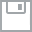
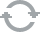
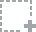
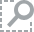
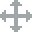
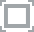
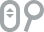
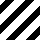
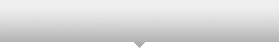
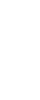
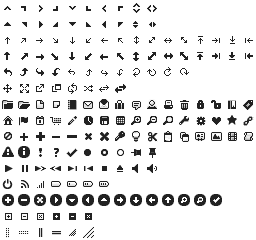
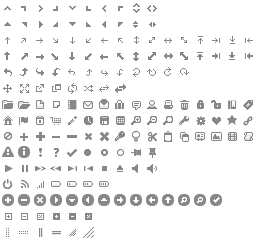
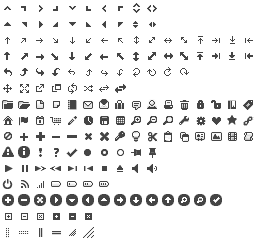
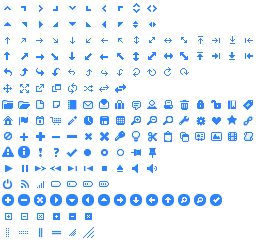
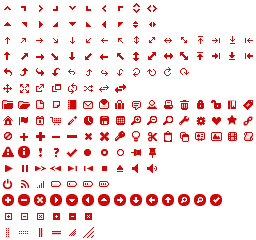
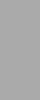
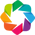
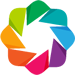

In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random


from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook()


In [2]:
irisDf = pd.read_csv('/home/anand/DataScientist/data/Iris.csv')
# Sample Timeseries  picked from here https://www.backblaze.com/b2/hard-drive-test-data.html
hdd2013Df = pd.read_csv('/home/anand/DataScientist/data/hdd_2013/2013-11-26.csv')

In [3]:
# Create classes for showing off correlation_analyze's heatmapping ability
def createClasses(x):
    rdm = random.random()
    if rdm < 0.3:
        return 'A'
    elif rdm > 0.3 and rdm < 0.6:
        return 'B' 
    else:
        return 'C'
irisDf['Class'] = [np.nan]*len(irisDf)
irisDf['Class'] = irisDf['Class'].apply(createClasses)

In [4]:
irisDf.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [5]:
irisDf.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Class
0            5.1           3.5            1.4           0.2     C
1            4.9           3.0            1.4           0.2     B
2            4.7           3.2            1.3           0.2     C
3            4.6           3.1            1.5           0.2     C
4            5.0           3.6            1.4           0.2     A

In [6]:
irisDf.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

In [7]:
irisDf.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [8]:
irisDf.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

In [9]:
numericalCols = irisDf.select_dtypes(include=[np.number]).columns

# Correlation btw Numerical Columns


W-1002 (EMPTY_LAYOUT): Layout has no children: GridPlot, ViewModel:GridPlot, ref _id: 098f154c-8bfe-455e-8c4b-54d2e927aa3a


# Correlation btw Numerical Columns


W-1002 (EMPTY_LAYOUT): Layout has no children: GridPlot, ViewModel:GridPlot, ref _id: 3543be33-00b0-419b-9350-37cdf51d4bb9


# Correlation btw Numerical Columns


W-1002 (EMPTY_LAYOUT): Layout has no children: GridPlot, ViewModel:GridPlot, ref _id: a2dfd29d-f298-4b52-a7fc-82e4dbe6900a


# Correlation btw Numerical Columns


W-1002 (EMPTY_LAYOUT): Layout has no children: GridPlot, ViewModel:GridPlot, ref _id: 59198b01-8992-457c-bc40-fa61ed4b1a13


# Correlation btw Numerical Columns


W-1002 (EMPTY_LAYOUT): Layout has no children: GridPlot, ViewModel:GridPlot, ref _id: d3527a14-3762-4791-ae68-879505a3c960


# Correlation btw Numerical Columns


W-1002 (EMPTY_LAYOUT): Layout has no children: GridPlot, ViewModel:GridPlot, ref _id: cdf3b6e8-6e6a-48d9-bf04-0f49922c0155


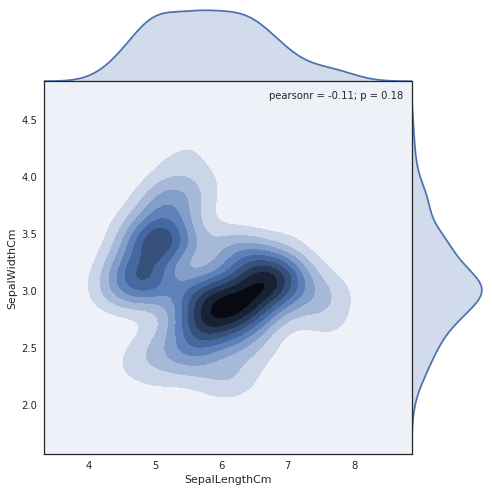

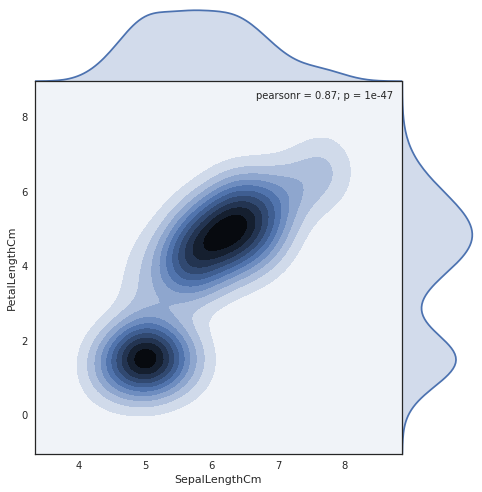

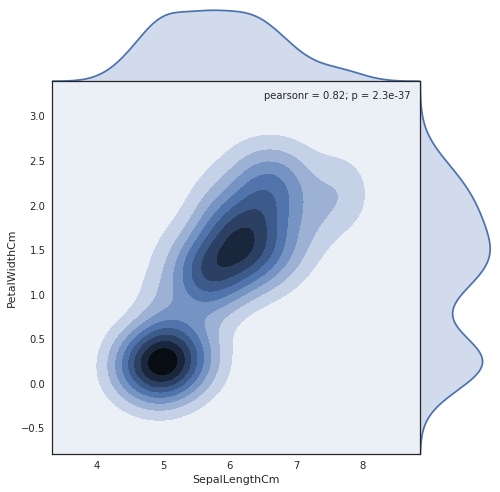

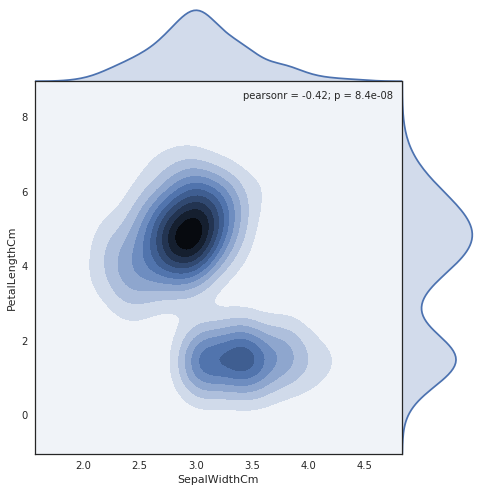

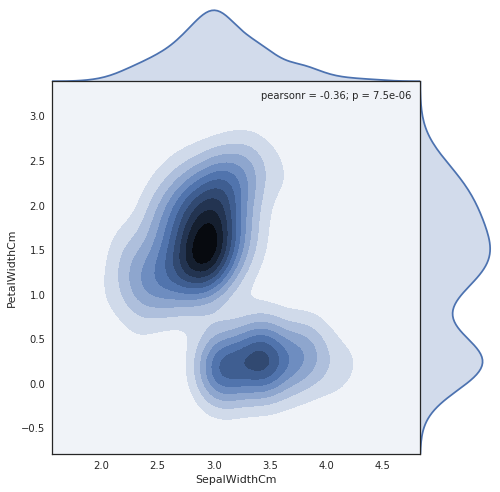

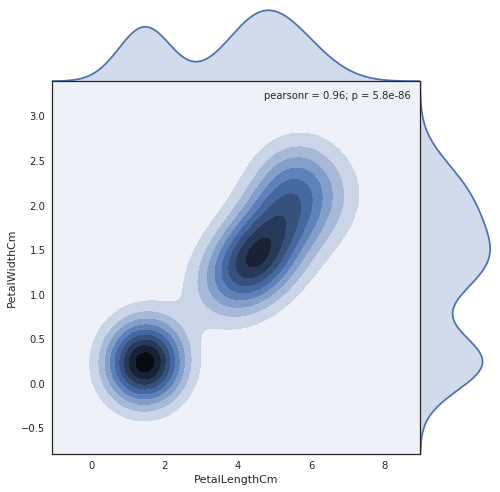

In [10]:
import itertools
for combo in itertools.combinations(numericalCols, 2):
    analyze.correlation_analyze(irisDf, combo[0], combo[1],
                                categories=['Class'], 
                                measures=['PetalLengthCm', 'PetalWidthCm'])

In [11]:
plotter.show(analyze.dist_analyze(irisDf, 'PetalLengthCm', bayesian_hist=False))

Variance of PetalLengthCm
3.11317941834
Skewness of PetalLengthCm
-0.274464252474
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=0.87653284874772308, pvalue=0.0)
Anderson-Darling normality test on PetalLengthCm 
Statistic: 7.672883 
 p-value: 0.000000



AttributeError: 'pandas._libs.interval.Interval' object has no attribute 'split'

In [ ]:
plotter.show(analyze.dist_analyze(irisDf, 'SepalLengthCm'))

In [ ]:
plotter.show(analyze.dist_analyze(irisDf, 'PetalLengthCm'))

In [ ]:
analyze.regression_analyze(irisDf, 'SepalLengthCm', 'SepalWidthCm', check_vif=False, check_heteroskedasticity=False)

P-value and test statistic for distribution similarity between SepalLengthCm and SepalWidthCm


In [ ]:
irisDf.head()

In [ ]:
irisDf.tail()

In [ ]:
plotter.show(analyze.fractal_analyze(irisDf, 'SepalLengthCm'))

In [ ]:
print(analyze.fractal_dimension(irisDf[['SepalLengthCm', 'PetalLengthCm']].as_matrix()))

In [ ]:
hdd2013Df.fillna(value=0, inplace=True)
hdd2013Df.describe()

In [ ]:
hdd2013Df.head()

In [ ]:
hdd2013Df['date'] = hdd2013Df['date'].astype('datetime64[ns]')

In [ ]:
hdd2013Df['date'] = [each + datetime.timedelta(0, i*45) for i, each in enumerate(hdd2013Df.date)]

In [ ]:
analyze.time_series_analysis(hdd2013Df, timeCol='date', valueCol='smart_1_raw', seasonal={'freq': '30s'})